In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import pickle
import re

from matplotlib.patches import Patch

In [3]:
seed_re = re.compile(r'seed-(\d+)')

In [4]:
def get_filenames(pattern):
    filenames = glob.glob(pattern)
    seed_filenames = dict()
    for filename in filenames:
        match = seed_re.search(filename)
        seed_filenames[int(match[1])] = filename
    return seed_filenames

In [5]:
def get_names(filenames):
    key = next(iter(filenames))
    with open(filenames[key], 'rb') as f:
        data = pickle.load(f)
    humans_rec_level = data['humans_rec_level']
    return sorted(humans_rec_level.keys())

In [11]:
def get_rec_levels(filename, names):
    with open(filename, 'rb') as f:
        data = pickle.load(f)

    humans_rec_level = data['humans_rec_level']
    intervention_day = data['intervention_day']
    num_days = len(humans_rec_level[names[0]])
    rec_levels = np.zeros((len(names), num_days), dtype=np.int_)
    for i, name in enumerate(names):
        rec_levels[i] = np.asarray(humans_rec_level[name], dtype=np.int_)
    rec_levels = rec_levels[:, intervention_day:]
    bincount = lambda x: np.bincount(x, minlength=4)

    return np.apply_along_axis(bincount, axis=0, arr=rec_levels) / len(names)

In [7]:
def get_intervention_levels(filename, names):
    with open(filename, 'rb') as f:
        data = pickle.load(f)

    humans_rec_level = data['humans_intervention_level']
    intervention_day = data['intervention_day']
    num_days = len(humans_rec_level[names[0]])
    rec_levels = np.zeros((len(names), num_days), dtype=np.int_)
    for i, name in enumerate(names):
        rec_levels[i] = np.asarray(humans_rec_level[name], dtype=np.int_)
    rec_levels = rec_levels[:, intervention_day:]
    bincount = lambda x: np.bincount(x, minlength=4)

    return np.apply_along_axis(bincount, axis=0, arr=rec_levels) / len(names)

In [8]:
heuristic = get_filenames('../2020-06-02/heuristic/*/*.pkl')
bdt1_2_heuristic = get_filenames('../2020-06-02/transport-bdt1-heuristic/*/*.pkl')
bdt2_2_heuristic = get_filenames('../2020-06-02/transport-bdt2-heuristic/*/*.pkl')

In [12]:
names = get_names(heuristic)
seed = 1005

In [22]:
colors = ['#4CAF50', '#FFEB3B', '#FF9800', '#F44336']

## Binary Digital Tracing 1st order with Heuristic v1 target

In [15]:
rec_levels = get_rec_levels(bdt1_2_heuristic[seed], names)
intervention_levels = get_intervention_levels(bdt1_2_heuristic[seed], names)
target_rec_levels = get_rec_levels(heuristic[seed], names)

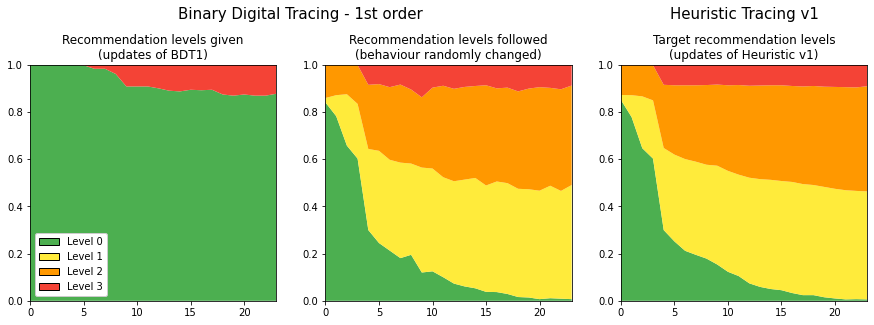

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(top=0.78)

legend_patches = [Patch(facecolor=color, edgecolor='k', label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

axes[0].stackplot(np.arange(rec_levels.shape[1]), rec_levels, colors=colors)
axes[0].margins(0, 0)
axes[0].set_title('Recommendation levels given\n(updates of BDT1)')
axes[0].legend(handles=legend_patches, loc='lower left', framealpha=1.0)
axis0_we = axes[0].get_window_extent()

axes[1].stackplot(np.arange(intervention_levels.shape[1]), intervention_levels, colors=colors)
axes[1].margins(0, 0)
axes[1].set_title('Recommendation levels followed\n(behaviour randomly changed)')
axis1_we = axes[1].get_window_extent()

axes[2].stackplot(np.arange(target_rec_levels.shape[1]), target_rec_levels, colors=colors)
axes[2].margins(0, 0)
axes[2].set_title('Target recommendation levels\n(updates of Heuristic v1)')
axis2_we = axes[2].get_window_extent()

# Titles
inv = fig.transFigure.inverted()

width_0 = axis0_we.x0 + 0.5 * (axis1_we.x0 + axis1_we.width - axis0_we.x0)
center_0 = inv.transform((width_0, 1))
plt.figtext(center_0[0], 0.92, 'Binary Digital Tracing - 1st order', va='center', ha='center', size=15)

width_1 = axis2_we.x0 + 0.5 * axis2_we.width
center_1 = inv.transform((width_1, 1))
plt.figtext(center_1[0], 0.92, 'Heuristic Tracing v1', va='center', ha='center', size=15)

plt.show()

## Binary Digital Tracing 2nd order with Heuristic v1 target

In [65]:
rec_levels_2 = get_rec_levels(bdt2_2_heuristic[seed], names)
intervention_levels_2 = get_intervention_levels(bdt2_2_heuristic[seed], names)

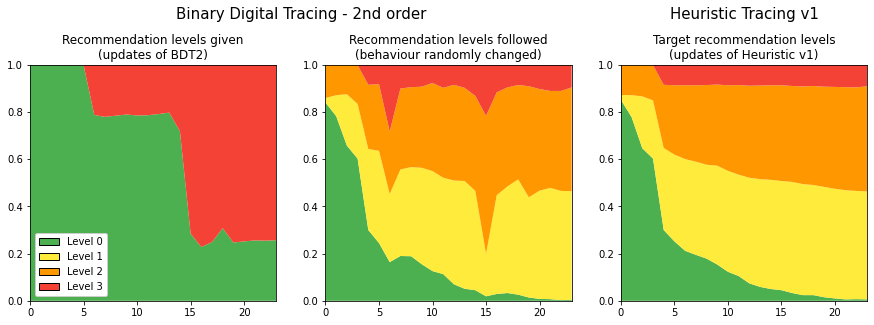

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(top=0.78)

legend_patches = [Patch(facecolor=color, edgecolor='k', label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

axes[0].stackplot(np.arange(rec_levels_2.shape[1]), rec_levels_2, colors=colors)
axes[0].margins(0, 0)
axes[0].set_title('Recommendation levels given\n(updates of BDT2)')
axes[0].legend(handles=legend_patches, loc='lower left', framealpha=1.0)
axis0_we = axes[0].get_window_extent()

axes[1].stackplot(np.arange(intervention_levels_2.shape[1]), intervention_levels_2, colors=colors)
axes[1].margins(0, 0)
axes[1].set_title('Recommendation levels followed\n(behaviour randomly changed)')
axis1_we = axes[1].get_window_extent()

axes[2].stackplot(np.arange(target_rec_levels.shape[1]), target_rec_levels, colors=colors)
axes[2].margins(0, 0)
axes[2].set_title('Target recommendation levels\n(updates of Heuristic v1)')
axis2_we = axes[2].get_window_extent()

# Titles
inv = fig.transFigure.inverted()

width_0 = axis0_we.x0 + 0.5 * (axis1_we.x0 + axis1_we.width - axis0_we.x0)
center_0 = inv.transform((width_0, 1))
plt.figtext(center_0[0], 0.92, 'Binary Digital Tracing - 2nd order', va='center', ha='center', size=15)

width_1 = axis2_we.x0 + 0.5 * axis2_we.width
center_1 = inv.transform((width_1, 1))
plt.figtext(center_1[0], 0.92, 'Heuristic Tracing v1', va='center', ha='center', size=15)

plt.show()